<a href="https://colab.research.google.com/github/CooperJB710/SQL-Lite--SuperHero/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [33]:
import sqlite3

# Connect to SQLite database (it will create a new one if it doesn’t exist)
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()

# Creating the heroes table
cursor.execute("""
CREATE TABLE IF NOT EXISTS heroes (
    hero_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT UNIQUE NOT NULL,
    powers TEXT,
    team TEXT
);
""")

# Creating the villains table
cursor.execute("""
CREATE TABLE IF NOT EXISTS villains (
    villain_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT UNIQUE NOT NULL,
    evil_plan TEXT
);
""")

# Creating the battles table
cursor.execute("""
CREATE TABLE IF NOT EXISTS battles (
    battle_id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villain_id INTEGER,
    outcome TEXT CHECK(outcome IN ('Hero Wins', 'Villain Wins')),
    FOREIGN KEY(hero_id) REFERENCES heroes(hero_id),
    FOREIGN KEY(villain_id) REFERENCES villains(villain_id)
);
""")

conn.commit()
print("Database and tables created successfully!")

Database and tables created successfully!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [37]:
import pandas as pd

# Load the CSV files
heroes_df = pd.read_csv("/content/heroes.csv")
villains_df = pd.read_csv("/content/villains.csv")
battles_df = pd.read_csv("/content/battles.csv")

# Insert data into heroes table
heroes_df.to_sql("heroes", conn, if_exists="append", index=False)

# Insert data into villains table
villains_df.to_sql("villains", conn, if_exists="append", index=False)

# Insert data into battles table
battles_df.to_sql("battles", conn, if_exists="append", index=False)

print("Data imported successfully!")

OperationalError: table heroes has no column named id

In [38]:
# Verify inserted data
print(pd.read_sql("SELECT * FROM heroes;", conn))
print(pd.read_sql("SELECT * FROM villains;", conn))
print(pd.read_sql("SELECT * FROM battles;", conn))

   hero_id            name               power            team
0        1      Spider-Man        Web-slinging        Avengers
1        2        Iron Man       Powered Armor        Avengers
2        3          Batman    Genius Detective  Justice League
3        4        Superman      Super Strength  Justice League
4        5            Thor      God of Thunder        Avengers
5        6    Wonder Woman  Amazonian Strength  Justice League
6        7   Black Panther    Enhanced Agility        Avengers
7        8       The Flash         Super Speed  Justice League
8        9            Hulk      Super Strength        Avengers
9       10  Doctor Strange         Mystic Arts        Avengers
   villain_id          name                           evil_plan
0           1  Green Goblin                  Terrorize New York
1           2        Thanos         Collect all Infinity Stones
2           3         Joker              Spread chaos in Gotham
3           4    Lex Luthor                     Def

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [26]:
query1 = "SELECT name, power FROM heroes;"
print(pd.read_sql(query1, conn))

             name               power
0      Spider-Man        Web-slinging
1        Iron Man       Powered Armor
2          Batman    Genius Detective
3        Superman      Super Strength
4            Thor      God of Thunder
5    Wonder Woman  Amazonian Strength
6   Black Panther    Enhanced Agility
7       The Flash         Super Speed
8            Hulk      Super Strength
9  Doctor Strange         Mystic Arts


In [27]:
query2 = """
SELECT heroes.name AS hero, villains.name AS villain, battles.outcome
FROM battles
JOIN heroes ON battles.hero_id = heroes.hero_id
JOIN villains ON battles.villain_id = villains.villain_id
WHERE battles.outcome = 'Hero Wins';
"""
print(pd.read_sql(query2, conn))

Empty DataFrame
Columns: [hero, villain, outcome]
Index: []


In [28]:
query3 = "SELECT name, evil_plan FROM villains;"
print(pd.read_sql(query3, conn))

           name                           evil_plan
0  Green Goblin                  Terrorize New York
1        Thanos         Collect all Infinity Stones
2         Joker              Spread chaos in Gotham
3    Lex Luthor                     Defeat Superman
4          Loki  Trick humanity into worshiping him
5        Ultron                 AI world domination
6      Darkseid                Control the universe
7         Venom                  Consume Spider-Man
8       Magneto                    Mutant supremacy
9     Red Skull                        Revive Hydra


In [29]:
query4 = """
SELECT heroes.name, COUNT(battles.battle_id) AS battle_count
FROM battles
JOIN heroes ON battles.hero_id = heroes.hero_id
GROUP BY heroes.name
ORDER BY battle_count DESC
LIMIT 1;
"""
print(pd.read_sql(query4, conn))

Empty DataFrame
Columns: [name, battle_count]
Index: []


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [30]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sidekicks (
    sidekick_id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    sidekick_name TEXT UNIQUE NOT NULL,
    FOREIGN KEY(hero_id) REFERENCES heroes(hero_id)
);
""")

# Insert sample sidekick data
cursor.executemany("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (?, ?);", [
    (1, "Robin"),
    (2, "Bucky Barnes"),
    (3, "War Machine")
])
conn.commit()
print("Sidekicks table created and populated successfully!")

Sidekicks table created and populated successfully!


In [31]:
query5 = """
SELECT heroes.name AS hero, sidekicks.sidekick_name
FROM sidekicks
JOIN heroes ON sidekicks.hero_id = heroes.hero_id;
"""
print(pd.read_sql(query5, conn))

          hero sidekick_name
0     Iron Man         Robin
1       Batman        Falcon
2   Spider-Man     Kid Flash
3     Iron Man         Robin
4       Batman        Falcon
5   Spider-Man     Kid Flash
6   Spider-Man         Robin
7     Iron Man  Bucky Barnes
8       Batman   War Machine
9   Spider-Man         Robin
10    Iron Man  Bucky Barnes
11      Batman   War Machine


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

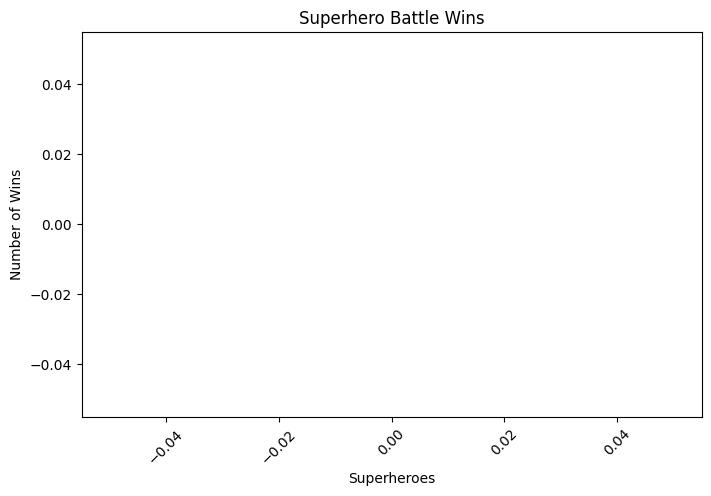

In [24]:
import matplotlib.pyplot as plt

# Query battle counts
battle_data = pd.read_sql("""
SELECT heroes.name, COUNT(battles.battle_id) AS wins
FROM battles
JOIN heroes ON battles.hero_id = heroes.hero_id
WHERE battles.outcome = 'Hero Wins'
GROUP BY heroes.name;
""", conn)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(battle_data['name'], battle_data['wins'], color='blue')
plt.xlabel("Superheroes")
plt.ylabel("Number of Wins")
plt.title("Superhero Battle Wins")
plt.xticks(rotation=45)
plt.show()

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!